In [2]:
# 1. 데이터 불러오기
# 셋 구분
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 정규화
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)


In [9]:
from threading import active_count
# 함수 만들기
def model_fn(a_layer=None):# 인자 입력 안했으면 None 주라고 기본값 지정
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

# flatten

In [10]:
model = model_fn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 컴파일
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 학습
result = model.fit(train_scaled, train_target, epochs=5) # 에포크 1번 돌았을 때 정확도 76% 나옴 >> 5번 학습(에포크) 돌았을 때, 85~88점 나옴
result.history.keys() # history: 무슨 값이 저장돼 있는지 dict 출력하기

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8922 - loss: 0.3015
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8985 - loss: 0.2883
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9008 - loss: 0.2785
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9035 - loss: 0.2689
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9069 - loss: 0.2628


dict_keys(['accuracy', 'loss'])

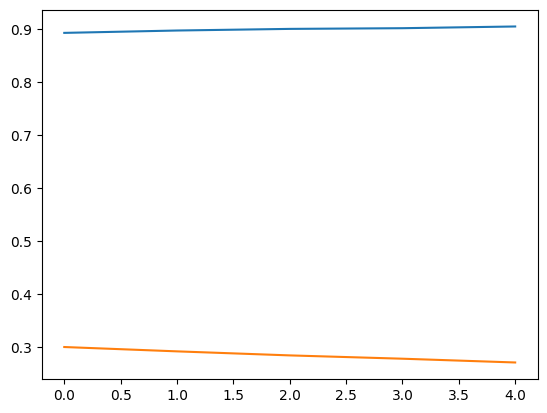

In [16]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy']) # 에포크 5번 도는 동안 정확도 증가함
plt.plot(result.history['loss']) # 손실률 에포크 도는 동안 감소하고 있음 확인

In [17]:
# 더 많이 학습시키기

result = model.fit(train_scaled, train_target, epochs=20) # 에포크 횟수 20번으로 증가 >> 정확도/손실률 조금씩 성능 개선됨(정확도: 90->93)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9083 - loss: 0.2621
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9080 - loss: 0.2542
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9112 - loss: 0.2554
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9167 - loss: 0.2468
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9152 - loss: 0.2436
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9186 - loss: 0.2364
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9190 - loss: 0.2353
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9211 - loss: 0.2270
Epoch 9/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9211 - loss: 0.2293
Epoch 10/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9228 - loss: 0.2255
Epoch 11/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9248 - loss: 0.2159
Epoch 12/20
1407/1407 ━━━━━━━━

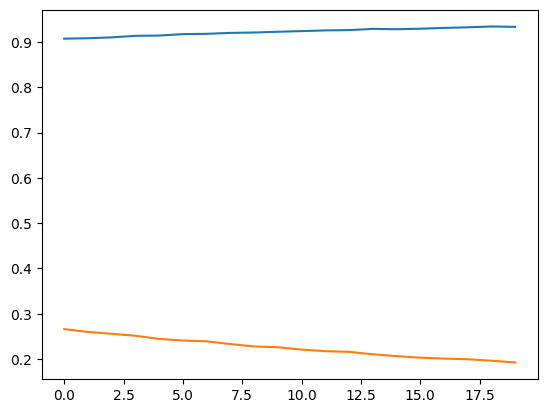

In [19]:
# 시각화
plt.plot(result.history['accuracy'])
plt.plot(result.history['loss'])

# 근데 한 학습 셋으로만 훈련하다보면, 과대적합 발생할 수 있음 >> val_scaled도 넣어서 학습해줘야 방지할 수 있음 -> 학습시킨 뒤 val로 검증하는 식으로 방지

In [23]:
# 검증하기
model = model_fn() # 새 모델 만들기

model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
result = model.fit(
    train_scaled, train_target,
    epochs=20,
    validation_data=(val_scaled, val_target)
)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7610 - loss: 0.6961 - val_accuracy: 0.8343 - val_loss: 0.4537
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8514 - loss: 0.4130 - val_accuracy: 0.8601 - val_loss: 0.3842
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8685 - loss: 0.3644 - val_accuracy: 0.8736 - val_loss: 0.3566
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8780 - loss: 0.3454 - val_accuracy: 0.8791 - val_loss: 0.3394
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8865 - loss: 0.3167 - val_accuracy: 0.8663 - val_loss: 0.3604
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8877 - loss: 0.3074 - val_accuracy: 0.8713 - val_loss: 0.3722
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8907 - loss: 0.3035 - val_accuracy: 0.8746 - val_loss: 0.3709
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8974 - loss: 0.2906 -

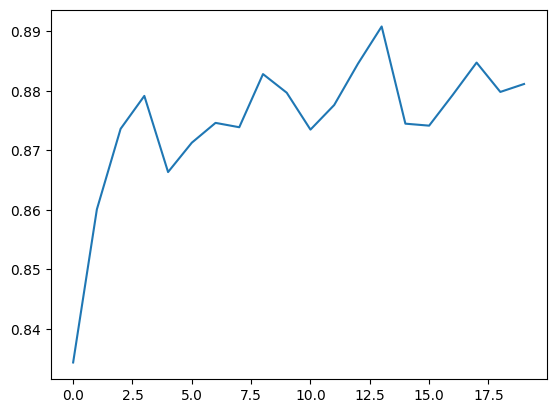

In [26]:
# 과대적합 발생했는지 확인 시각화
plt.plot(result.history['val_accuracy'])
# val_loss, val_accuracy: 학습용 데이터에 과대적합 돼 있어서 들쭉날쭉하게 나옴 -> 학습 데이터는 일정히 개선되는데, val은 들쭉날쭉해 평탄화시켜야 함

In [29]:
# 아담으로 성능 개선해보기
model = model_fn()
model.compile(
    optimizer='adam', # 아담만 추가한 것
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
result = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7717 - loss: 0.6776 - val_accuracy: 0.8446 - val_loss: 0.4426
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8578 - loss: 0.4054 - val_accuracy: 0.8701 - val_loss: 0.3631
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8739 - loss: 0.3539 - val_accuracy: 0.8777 - val_loss: 0.3391
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8829 - loss: 0.3271 - val_accuracy: 0.8801 - val_loss: 0.3379
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8856 - loss: 0.3116 - val_accuracy: 0.8756 - val_loss: 0.3401
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8920 - loss: 0.2910 - val_accuracy: 0.8792 - val_loss: 0.3296
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8979 - loss: 0.2768 - val_accuracy: 0.8819 - val_loss: 0.3279
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9022 - loss: 0.2638 -

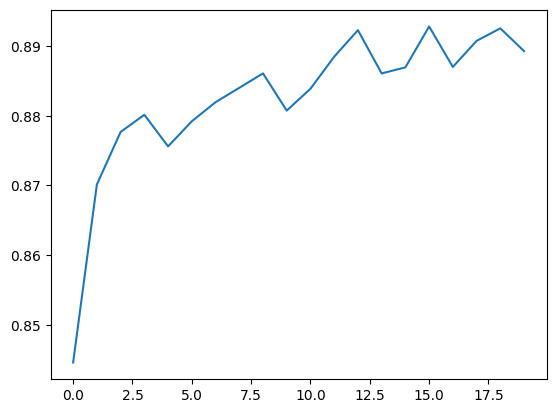

In [30]:
plt.plot(result.history['val_accuracy'])
# 아담으로 바꾸면 과대적합 조금 해소할 수 있음

In [34]:
# 드롭아웃 활용

model = model_fn(keras.layers.Dropout(0.3)) # 30%의 뉴런을 껐다 키겠단 것
model.summary()
# 100개의 뉴런에 붙어서 각각 키고 출력, 끄고 출력 >> 뭐가 중요한 뉴런인지 확인 도와줌

# 학습
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
result = model.fit(train_scaled, train_target, epochs=20,
                   validation_data=(val_scaled, val_target))

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7313 - loss: 0.7762 - val_accuracy: 0.8469 - val_loss: 0.4179
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8372 - loss: 0.4562 - val_accuracy: 0.8602 - val_loss: 0.3751
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8495 - loss: 0.4144 - val_accuracy: 0.8705 - val_loss: 0.3532
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8588 - loss: 0.3911 - val_accuracy: 0.8739 - val_loss: 0.3414
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8666 - loss: 0.3688 - val_accuracy: 0.8753 - val_loss: 0.3324
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8677 - loss: 0.3547 - val_accuracy: 0.8817 - val_loss: 0.3263
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8708 - loss: 0.3521 - val_accuracy: 0.8789 - val_loss: 0.3273
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8748 - loss: 0.3378 -

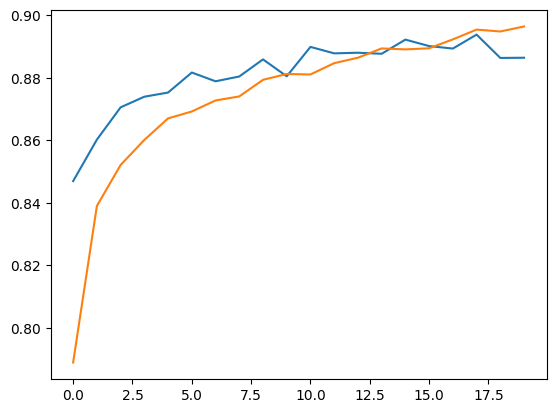

In [36]:
# 시각화
plt.plot(result.history['val_accuracy'])
plt.plot(result.history['accuracy'])
# 드롭아웃하니 학습 효율 좋아짐 -> 평탄화됨
  # 뉴런 온오프하며 보편적인 결과 낸 것

In [38]:
# 가중치 저장하기
model.save_weights('my_model.weights.h5') # 파라미터 값(가중치)만 구글 드라이브에 저장
  # model.load_weights('my_model.weights.h5')
# 모델 저장
model.save('my_model.keras')

In [43]:
# 콜백
model = model_fn(keras.layers.Dropout(0.3)) # 새 모델 생성
model.compile(optimizer='adam', # 모델 학습 설정
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 콜백/조기종료
cp = keras.callbacks.ModelCheckpoint('best_model.keras',# 콜백하기 >> 에포크 돌릴 때 마다 정확도 측정 >> 가장 좋다 생각하는 에포크를 이런 확장자 이름으로 저장
                                     save_best_only='True') # 가장 성능 좋은 에포크 하나만 기록해 저장

es = keras.callbacks.EarlyStopping(patience=2) # 에포크 더 반복 못하게 제한

# 에포크 돌 때, 2번 이상 오히려 성능 감소할 시 -> 감소 이전의 에포크를 베스트로 지정 -> 이후 조기종료 설정한 것

# 학습
result = model.fit(train_scaled, train_target, epochs=20,
                   validation_data=(val_scaled, val_target),
                   callbacks=[cp, es]) # 콜백/조기종료 설정한 값 학습시킬 때 등록해야 작동
# > 15번째 에포크에서 멈춤

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7253 - loss: 0.7875 - val_accuracy: 0.8546 - val_loss: 0.4160
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8366 - loss: 0.4500 - val_accuracy: 0.8599 - val_loss: 0.3834
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8525 - loss: 0.4143 - val_accuracy: 0.8685 - val_loss: 0.3661
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8584 - loss: 0.3940 - val_accuracy: 0.8747 - val_loss: 0.3510
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8633 - loss: 0.3785 - val_accuracy: 0.8769 - val_loss: 0.3391
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8701 - loss: 0.3560 - val_accuracy: 0.8789 - val_loss: 0.3328
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8718 - loss: 0.3490 - val_accuracy: 0.8811 - val_loss: 0.3295
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8758 - loss: 0.3378 -